## Reto 6: Lo que los científicos aman

### 1. Objetivos:
    - Practicar las siguientes herramientas:
        - Lectura de .csv
        - `merge`
        - Filtros con value_counts()
        - Agrupaciones y reordenamientos
    
---
    
### 2. Desarrollo:

#### a) Lo que los científicos aman

En este Reto vamos a obtener una lista de las películas que fueron mejor evaluadas por científicos para saber cuáles son sus favoritas. Vamos a realizar los siguientes pasos:

1. Lee los archivos para `movies`, `ratings` y `users`.
2. Agrega **solamente** la columna `occupation` al `DataFrame` `ratings`, para tener la información de las ocupaciones de los usuarios que realizaron los ratings.
3. Filtra tu tabla `ratings` para quedarte solamente con los ratings hechos por científicos.
4. Agrega **solamente** la columna `title` de la tabla `movies` a la tabla `ratings` para tener la información de los nombres de las películas que fueron evaluadas por científicos.
5. Filtra tu `DataFrame` para quedarte **solamente** con las películas que fueron evaluadas más de 50 veces.
6. Realiza una agrupación por película y computa el promedio de los ratings de cada película.
7. Ordena la `Serie` resultante descendentemente y asígnala  a la variable `mean_of_scientists_ratings_sorted`.

> **Nota**: el paso #5 es un poco complejo. No te desesperes si no encuentras una solución rápidamente. ¡Pídele a la experta que te guíe para que puedas resolverlo sin que te explote la cabeza!

In [1]:
import pandas as pd

In [5]:
movies = pd.read_csv("https://raw.githubusercontent.com/beduExpert/Procesamiento-de-Datos-con-Python-Santander/master/Datasets/MovieLens/movies-separated_by_money-raw.csv", sep="$")
movies = movies.set_index('movie_id', drop=True)
ratings = pd.read_csv("https://raw.githubusercontent.com/beduExpert/Procesamiento-de-Datos-con-Python-Santander/master/Datasets/MovieLens/ratings-raw.csv")
users = pd.read_csv("https://raw.githubusercontent.com/beduExpert/Procesamiento-de-Datos-con-Python-Santander/master/Datasets/MovieLens/users-raw.csv")
users = users.set_index('user_id', drop=True)

In [8]:
rat_occ = pd.merge(ratings, users["occupation"], left_on="user_id", right_index=True)

In [15]:
occps = pd.read_csv("https://raw.githubusercontent.com/beduExpert/Procesamiento-de-Datos-con-Python-Santander/master/Datasets/MovieLens/occupations-raw.csv")
occps[occps["description"] == "scientist"]

,occupation_id,description
15,15,scientist


In [19]:
rat_sci = rat_occ[rat_occ["occupation"] == 15]

In [21]:
rat_title_sci = pd.merge(rat_sci, movies["title"], left_on="movie_id", right_index=True)

In [36]:
has_more_50 = rat_title_sci.groupby("movie_id")["rating"].count() > 50
has_more = has_more_50[has_more_50 == True]

rat_more_50 = rat_title_sci.apply(lambda g: g["movie_id"] in has_more, axis=1)
rat_more_50 = rat_title_sci[rat_more_50]

In [49]:
mean_of_scientists_ratings_sorted = rat_more_50.groupby("title")["rating"].agg(pd.Series.mean).sort_values(ascending=False)

Pídele a tu experta la función de verificación `visualizar_lista` (encontrada en el archivo `helpers.py` de la carpeta donde se encuentra este Reto), pégala debajo y corre la celda para verificar tu resultado.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


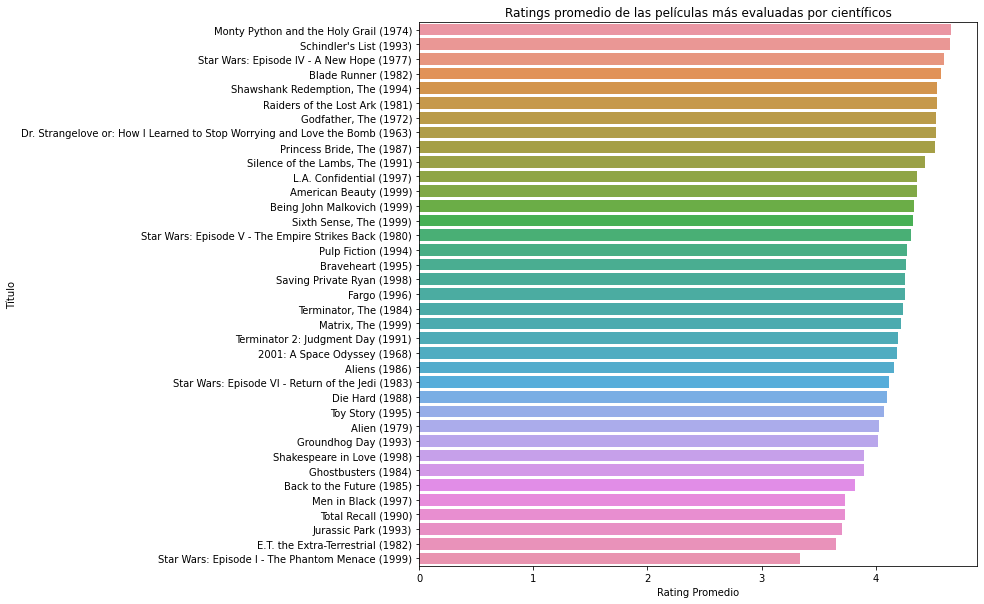

In [50]:
def visualizar_lista(mean_of_scientists_ratings_sorted):
    import matplotlib.pyplot as plt
    import seaborn as sns

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_title('Ratings promedio de las películas más evaluadas por científicos')
    sns.barplot(mean_of_scientists_ratings_sorted, mean_of_scientists_ratings_sorted.index, ax=ax)
    ax.set(ylabel='Título', xlabel='Rating Promedio')

visualizar_lista(mean_of_scientists_ratings_sorted)